<a href="https://colab.research.google.com/github/yasirunadeeshaa/Machine-Learning/blob/test/Superviced_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

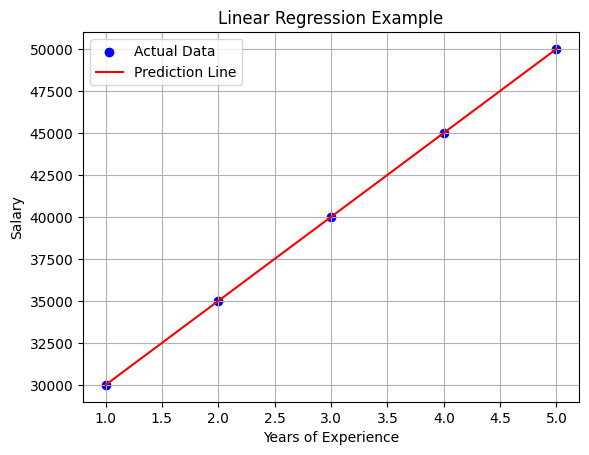

Predicted salary for 6 years experience: $55,000.00
The equation is: Salary = 5000.00 * Experience + 25000.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Years of experience (X) and corresponding salary (Y)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # independent variable (experience)
Y = np.array([30000, 35000, 40000, 45000, 50000])  # dependent variable (salary)


# Create the model
model = LinearRegression()

# Fit (train) the model on your data
model.fit(X, Y)


# Predict the salary for the same experience years
Y_pred = model.predict(X)

# Plot the data and the line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Prediction Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Example")
plt.legend()
plt.grid(True)
plt.show()

experience = np.array([[6]])  # Predict for 6 years
predicted_salary = model.predict(experience)
print(f"Predicted salary for 6 years experience: ${predicted_salary[0]:,.2f}")

slope = model.coef_[0]
intercept = model.intercept_
print(f"The equation is: Salary = {slope:.2f} * Experience + {intercept:.2f}")


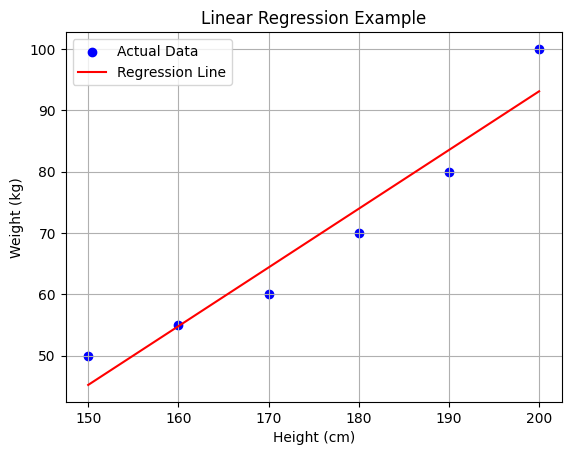

Predicted weight for 175 cm is: 69.17 kg
Slope (m): 0.96
Intercept (b): -98.33
Equation: weight = 0.96 * height + -98.33


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Input data (height in cm)
X = np.array([150, 160, 170, 180, 190 , 200]).reshape(-1, 1)

# Output data (weight in kg)
Y = np.array([50, 55, 60, 70, 80,100])

# Create model
model = LinearRegression()

# Train (fit) the model
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plot original data
plt.scatter(X, Y, color='blue', label='Actual Data')

# Plot regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Linear Regression Example")
plt.legend()
plt.grid(True)
plt.show()

new_height = np.array([[175]])
predicted_weight = model.predict(new_height)
print(f"Predicted weight for 175 cm is: {predicted_weight[0]:.2f} kg")

print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (b): {model.intercept_:.2f}")
print(f"Equation: weight = {model.coef_[0]:.2f} * height + {model.intercept_:.2f}")


# Classification

### Binary Classification (Logistic Regression)

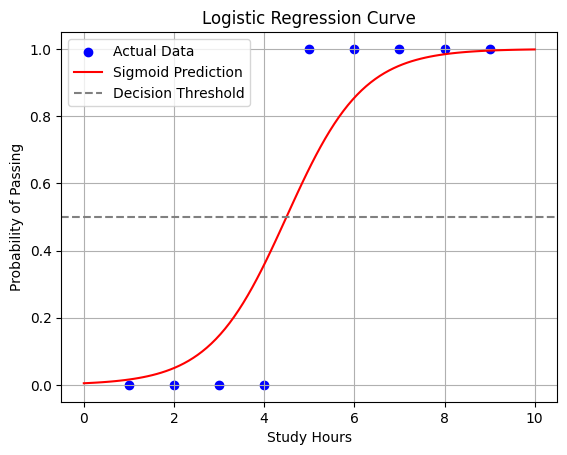

Probability of passing at 4.5 hours: 0.50
Prediction: Pass


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Sample data: Hours studied and result (0=Fail, 1=Pass)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

# 2. Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# 3. Predict probabilities for each X
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# 4. Plot sigmoid curve
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_prob, color='red', label='Sigmoid Prediction')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold')
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Curve")
plt.legend()
plt.grid(True)
plt.show()

hours = np.array([[4.5]])
result = model.predict(hours)
prob = model.predict_proba(hours)[0][1]

print(f"Probability of passing at 4.5 hours: {prob:.2f}")
print("Prediction:", "Pass" if result[0] == 1 else "Fail")


### Multi Class Classification

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Predicted flower class: setosa


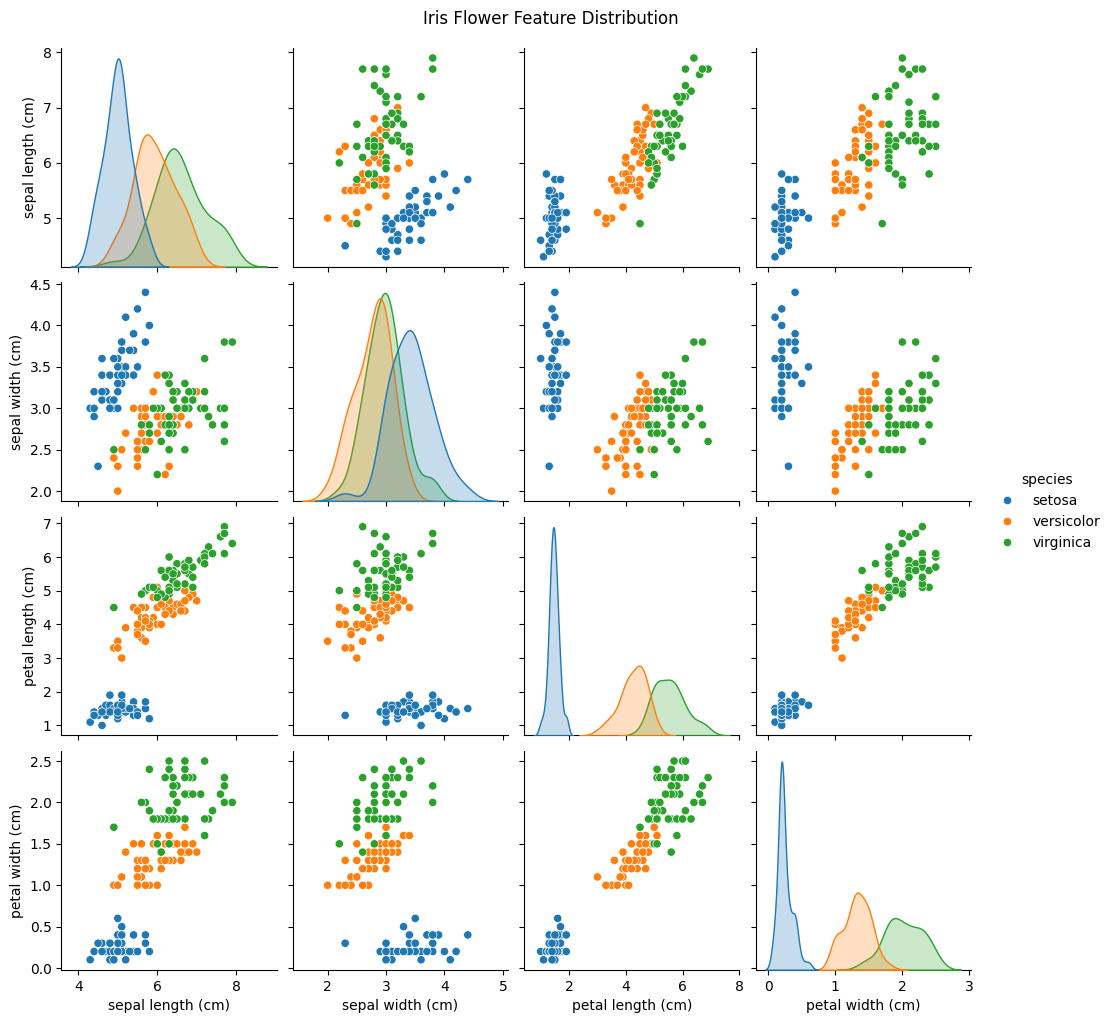

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, petal length, etc.
y = iris.target  # 0, 1, 2 (Setosa, Versicolor, Virginica)
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with multi-class support (softmax)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

sample = [[5.1, 3.5, 1.4, 0.2]]  # A real Setosa flower
predicted_class = model.predict(sample)[0]
class_name = iris.target_names[predicted_class]

print(f"Predicted flower class: {class_name}")

import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Pair plot
sns.pairplot(df, hue='species')
plt.suptitle("Iris Flower Feature Distribution", y=1.02)
plt.show()
